In [1]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import (LinearRegression, BayesianRidge,
                                  Lasso, Ridge, ElasticNet, Lars)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from utilities import cross_validation_calculate_statistics, calculate_x_statistics, sm_grid_search_cv, calculate_r_square

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,896,2,0,46.0,3,5,0,0,0,0,...,2,3,0,7,3,13,2,7,18,2350000.0
1,399,2,0,44.6,5,5,0,0,0,0,...,3,5,0,7,3,11,1,4,11,1799000.0
2,1515,2,0,53.0,1,9,0,1,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,1216,2,0,64.0,4,5,0,0,0,1,...,31,5,1,55,2,10,28,32,17,3970000.0
4,677,1,0,33.3,1,10,0,0,1,0,...,1,3,0,2,3,9,0,3,6,1880000.0


In [4]:
train_df.describe(include='all')

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,794.887376,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,461.218298,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,406.500000,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,774.500000,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,1181.500000,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,1615.000000,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


In [5]:
train_df.isna().sum()

id                           0
Количество.комнат            0
Студия                       0
Общая.площадь                0
Этаж                         0
Этажей.в.доме                0
Парковка                     0
Без.ремонта                  0
Дизайнерский                 0
Евроремонт                   0
Косметический                0
Балкон                       0
Лоджия                       0
Совмещенный.санузел          0
Раздельный.санузел           0
Лифт                         0
Грузовой.лифт                0
Мусоропровод                 0
Год.постройки                0
Аварийный                    0
Железобетонные.перекрытия    0
Смешанные.перекрытия         0
Деревянные.перекрытия        0
Иные.перекрытия              0
Панельные.стены              0
Блочные.стены                0
Деревянные.стены             0
Кирпичные.стены              0
Монолитные.стены             0
Смешанные.стены              0
Школа.1000                   0
ВУЗ.1000                     0
ТЦ.1000 

In [6]:
train_df.drop('id', axis=1, inplace=True)

In [7]:
train_df.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,0.772277,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,0.419622,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


<Axes: >

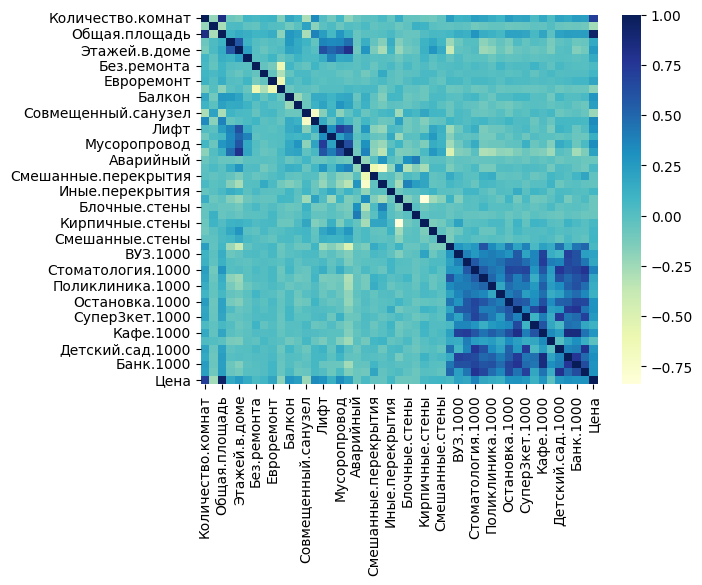

In [8]:
sns.heatmap(train_df.corr(), cmap="YlGnBu")

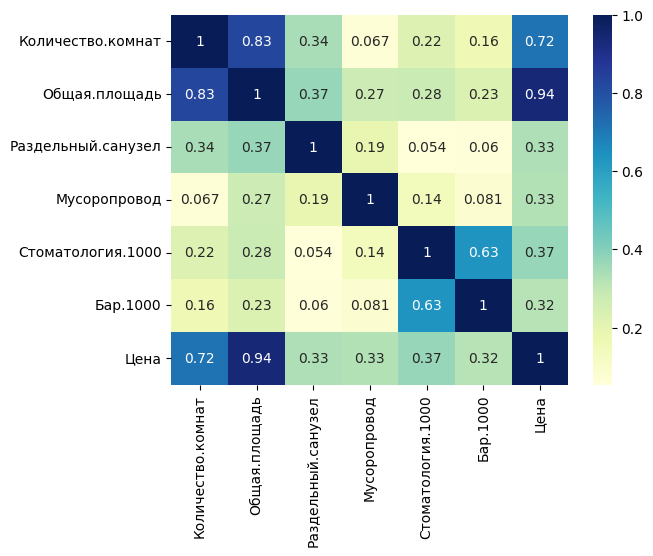

In [9]:
corr_matrix = train_df.corr()

# Отфильтровываем только необходимые значения корреляции
top_corr_features = corr_matrix.index[abs(corr_matrix['Цена']) > 0.3]

# Создание карты корреляции
sns.heatmap(train_df[top_corr_features].corr(), annot=True, cmap="YlGnBu")
train_df = train_df[top_corr_features]

<Axes: >

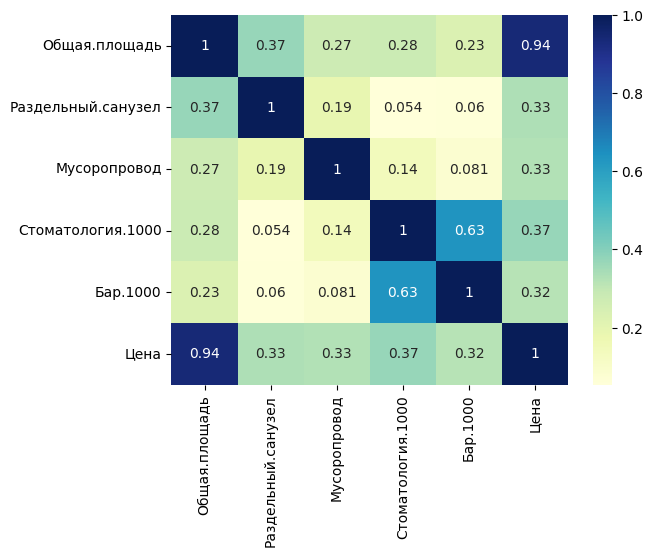

In [10]:
features = train_df.drop('Цена', axis=1)
corr_matrix = features.corr()

high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_corr.add((corr_matrix.columns[i], corr_matrix.columns[j]))

price_corr = train_df.corr()['Цена']
to_drop = set()
for feature_1, feature_2 in high_corr:
    if abs(price_corr[feature_1]) < abs(price_corr[feature_2]):
        to_drop.add(feature_1)
    else:
        to_drop.add(feature_2)
train_df.drop(to_drop, axis=1, inplace=True)

sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

In [11]:
y = train_df['Цена']
x = train_df.drop('Цена', axis=1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [13]:
lr = LinearRegression()
selector = SequentialFeatureSelector(lr)
selector.fit(x_train, y_train)
mask = selector.get_support()
x_train_lr = x_train.loc[:, mask]
x_test_lr = x_test.loc[:, mask]
lr_model = {'МНК': {'model': LinearRegression(), 'params': {}}}
lr_stats = cross_validation_calculate_statistics(lr_model, x_train_lr, y_train, x_test_lr, y_test)
display(lr_stats)

stats_gen = calculate_x_statistics(lr_model, x_train_lr, y_train, x_test_lr, y_test)

for model_name, stats in stats_gen:
    print(model_name)
    display(stats)

names = ['МНК']
scores = [(lr_stats['R^2'][0], lr_stats['RMSE'][0])]

,Name,R^2,Adj.R^2,RMSE,AIC,BIC
0,МНК,0.863567,0.86243,375689.384717,6242.547737,6939.137987


МНК


,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Coefficient is significant
0,Общая.площадь,51266.668606,719.873422,71.216226,0.000000e+00,[49848.59165423 52684.7455571 ],Yes
1,Стоматология.1000,20498.934820,3534.450890,5.799751,2.084146e-08,[13536.42837194 27461.44126906],Yes


In [14]:
lar = Lars()
selector = SequentialFeatureSelector(lar)
selector.fit(x_train, y_train)
mask = selector.get_support()
x_train_lar = x_train.loc[:, mask]
x_test_lar = x_test.loc[:, mask]
lar_model = {'Lars': {'model': Lars(), 'params': {}}}
lar_stats = cross_validation_calculate_statistics(lar_model, x_train_lar, y_train, x_test_lar, y_test)
display(lar_stats)

stats_gen = calculate_x_statistics(lar_model, x_train_lar, y_train, x_test_lar, y_test)

for model_name, stats in stats_gen:
    print(model_name)
    display(stats)

names.append('Lars')
scores.append((lar_stats['R^2'][0], lar_stats['RMSE'][0]))

,Name,R^2,Adj.R^2,RMSE,AIC,BIC
0,Lars,0.863567,0.86243,375689.384717,6242.547737,6939.137987


Lars


,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Coefficient is significant
0,Общая.площадь,51266.668606,719.873422,71.216226,0.000000e+00,[49848.59165423 52684.7455571 ],Yes
1,Стоматология.1000,20498.934820,3534.450890,5.799751,2.084146e-08,[13536.42837194 27461.44126906],Yes


In [15]:
poly_features = PolynomialFeatures(degree=3)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
lr = LinearRegression()

p_model = {'Poly': {'model': LinearRegression(), 'params': {}}}
p_stats = cross_validation_calculate_statistics(p_model, x_train_poly, y_train, x_test_poly, y_test)
display(p_stats)

stats_gen = calculate_x_statistics(p_model, x_train, y_train, x_test, y_test)

for model_name, stats in stats_gen:
    print(model_name)
    display(stats)

names.append('Poly')
scores.append((p_stats['R^2'][0], p_stats['RMSE'][0]))

,Name,R^2,Adj.R^2,RMSE,AIC,BIC
0,Poly,0.861733,0.820104,378205.425372,6353.791691,7239.007259


Poly


,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Coefficient is significant
0,Общая.площадь,50557.160626,955.346862,52.920214,0.000000,[48675.10436981 52439.21688287],Yes
1,Раздельный.санузел,-66481.210709,50036.692562,-1.328649,0.185242,[-165054.69645723 32092.2750394 ],No
2,Мусоропровод,164282.908801,48946.685788,3.356364,0.000920,[ 67856.76256834 260709.05503284],Yes
3,Стоматология.1000,13303.164403,4962.015447,2.681000,0.007856,[ 3527.87483271 23078.45397355],Yes
4,Бар.1000,11083.824123,7266.794847,1.525270,0.128525,[-3231.93620433 25399.58445056],No


In [16]:
models = {'Лассо': {'model': Lasso(), 'params': {'alpha': range(0, 20), 'selection': ['cyclic', 'random']}},
          'Гребневая': {'model': Ridge(), 'params': {'alpha': range(0, 20), 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}},
          'Elastic-Net': {'model': ElasticNet(), 'params': {'alpha': range(0, 20), 'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'selection': ['cyclic', 'random']}},
          'Байесовская регрессия': {'model': BayesianRidge(), 'params': {'n_iter': [300, 600, 900, 1200]}}}

stats = cross_validation_calculate_statistics(models, x_train, y_train, x_test, y_test)
display(stats)

for i, name in enumerate(models.keys()):
    names.append(name)
    scores.append((stats['R^2'][i], stats['RMSE'][i]))

,Name,R^2,Adj.R^2,RMSE,AIC,BIC
0,Лассо,0.867668,0.864876,369999.180113,6241.130449,6948.199884
1,Гребневая,0.867952,0.865166,369601.653094,6240.608010,6947.677445
2,Elastic-Net,0.867669,0.864877,369997.853371,6241.128707,6948.198141
3,Байесовская регрессия,0.868259,0.865480,369171.500884,6240.042061,6947.111496


In [17]:
stats_gen = calculate_x_statistics(models, x_train, y_train, x_test, y_test)

for model_name, stats in stats_gen:
    print(model_name)
    display(stats)

Лассо


,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Coefficient is significant
0,Общая.площадь,50557.000930,955.336686,52.920611,0.000000,[48674.96472176 52439.03713903],Yes
1,Раздельный.санузел,-66430.893220,50036.159565,-1.327658,0.185569,[-165003.32895123 32141.54251204],No
2,Мусоропровод,164233.878557,48946.164402,3.355398,0.000923,[ 67808.7594679 260658.99764648],Yes
3,Стоматология.1000,13303.404670,4961.962591,2.681077,0.007854,[ 3528.21922744 23078.59011316],Yes
4,Бар.1000,11083.553728,7266.717440,1.525249,0.128530,[-3232.05410668 25399.16156179],No


Гребневая


,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Coefficient is significant
0,Общая.площадь,50576.688390,954.307672,52.998304,0.000000,[48696.6793639 52456.69741655],Yes
1,Раздельный.санузел,-61465.173967,49982.264525,-1.229740,0.220014,[-159931.43517507 37001.08724067],No
2,Мусоропровод,154163.630361,48893.443419,3.153053,0.001824,[ 57842.37287345 250484.88784783],Yes
3,Стоматология.1000,13357.284769,4956.617953,2.694838,0.007546,[ 3592.62839205 23121.94114622],Yes
4,Бар.1000,11064.440148,7258.890300,1.524261,0.128777,[-3235.74803201 25364.62832864],No


Elastic-Net


,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Coefficient is significant
0,Общая.площадь,50557.071135,955.341823,52.920400,0.000000,[48675.02480654 52439.11746444],Yes
1,Раздельный.санузел,-66455.254672,50036.428626,-1.328137,0.185410,[-165028.22045908 32117.71111533],No
2,Мусоропровод,164258.557059,48946.427601,3.355884,0.000921,[ 67832.91946074 260684.19465684],Yes
3,Стоматология.1000,13303.414204,4961.989273,2.681065,0.007854,[ 3528.17619724 23078.65221156],Yes
4,Бар.1000,11083.607933,7266.756516,1.525248,0.128531,[-3232.07688125 25399.29274644],No


Байесовская регрессия


,Name,Estimate,Standard Error,t-value,p-value,95% Confidence Interval,Coefficient is significant
0,Общая.площадь,50605.543682,953.197023,53.090329,0.000000,[48727.72266015 52483.36470404],Yes
1,Раздельный.санузел,-54613.327724,49924.093839,-1.093927,0.275097,[-152964.99128494 43738.33583642],No
2,Мусоропровод,139974.072437,48836.539933,2.866175,0.004528,[ 43764.91618467 236183.22868913],Yes
3,Стоматология.1000,13432.020765,4950.849309,2.713074,0.007155,[ 3678.72875366 23185.31277551],Yes
4,Бар.1000,11037.056446,7250.442211,1.522260,0.129277,[-3246.48879551 25320.60168834],No


In [18]:
model, result = sm_grid_search_cv('GLS', x_train, y_train)
print(f'GLS RMSE: {result}')
print(model.summary())
names.append('GLS')
y_pred = model.predict(x_test)
scores.append((calculate_r_square(y_test, y_pred), result))

GLS RMSE: 338638.70905410696
                                 GLS Regression Results                                
Dep. Variable:                   Цена   R-squared (uncentered):                   0.986
Model:                            GLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              6475.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):                        0.00
Time:                        12:41:01   Log-Likelihood:                         -6398.6
No. Observations:                 452   AIC:                                  1.281e+04
Df Residuals:                     447   BIC:                                  1.283e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
----

In [19]:
model, result = sm_grid_search_cv('WLS', x_train, y_train)
print(f'WLS RMSE: {result}')
print(model.summary())
names.append('WLS')
y_pred = model.predict(x_test)
scores.append((calculate_r_square(y_test, y_pred), result))

WLS RMSE: 337284.0585407006
                                 WLS Regression Results                                
Dep. Variable:                   Цена   R-squared (uncentered):                   0.989
Model:                            WLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              7769.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):                        0.00
Time:                        12:41:01   Log-Likelihood:                         -6363.0
No. Observations:                 452   AIC:                                  1.274e+04
Df Residuals:                     447   BIC:                                  1.276e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-----

In [20]:
model = sm.nonparametric.KernelReg(y_train, x_train, var_type='cuucc')
y_pred = model.fit(x_test)[0]
print('RMSE =', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 =', r2_score(y_test, y_pred))

names.append('Non.Params')
scores.append((r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False)))

RMSE = 360084.5054970192
R^2 = 0.8746651412735535


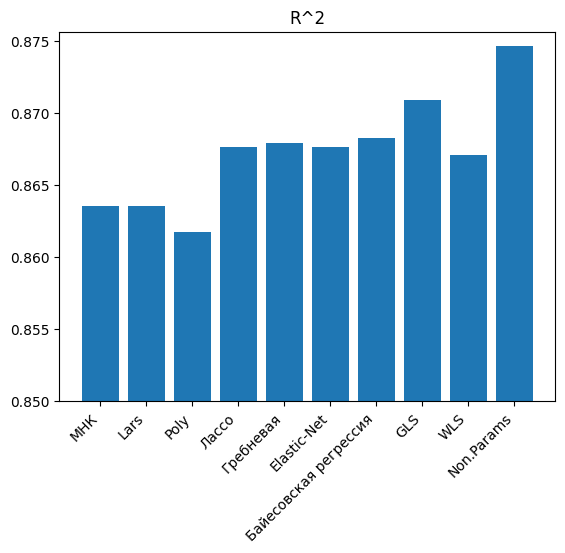

In [21]:
r2 = [scores[i][0] for i in range(len(scores))]
plt.bar(names, r2)
plt.xticks(rotation=45, ha='right')
plt.gca().set_ylim([0.85, max(r2) + 0.001])
plt.title('R^2')
plt.show()

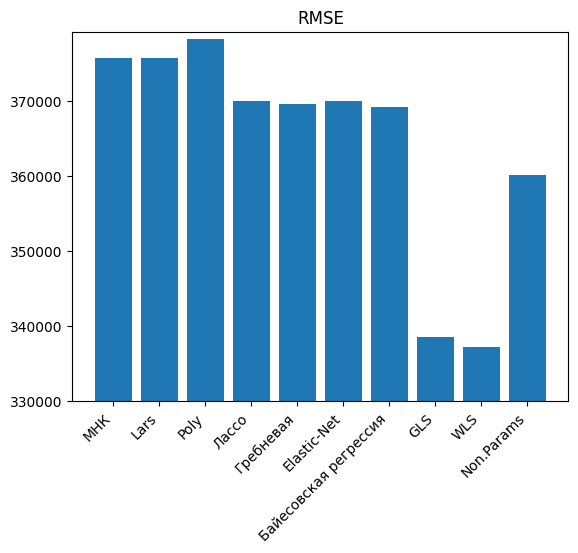

In [22]:
rmse = [scores[i][1] for i in range(len(scores))]
plt.bar(names, rmse)
plt.xticks(rotation=45, ha='right')
plt.gca().set_ylim([330000, max(rmse) + 1000])
plt.title('RMSE')
plt.show()